# Multiple Linear Regression

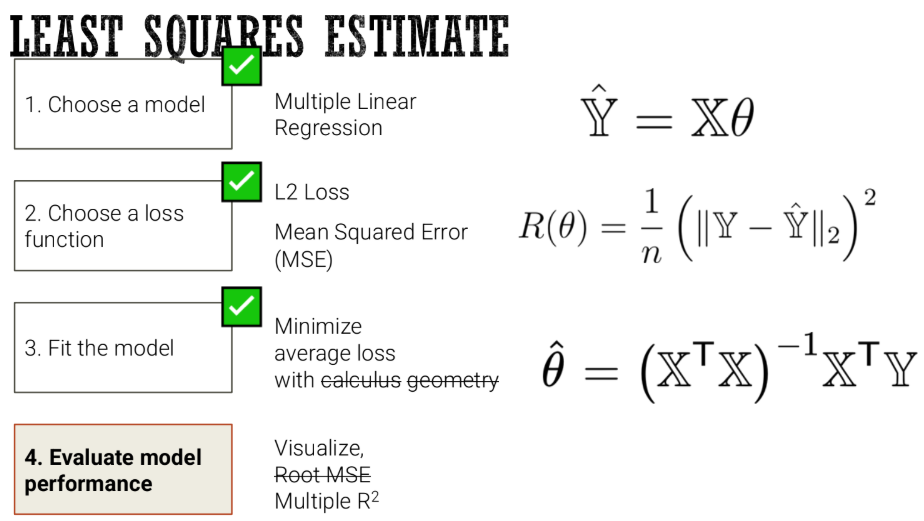

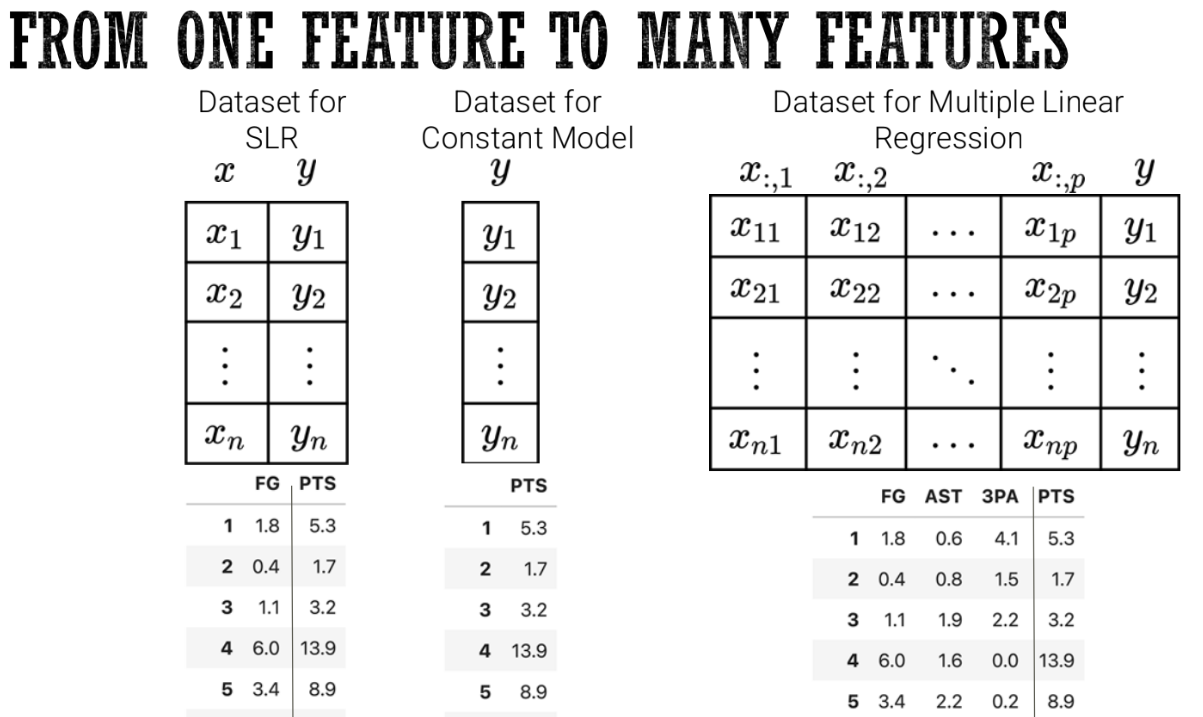

## 1.Choose the Model

### Matrix Notation

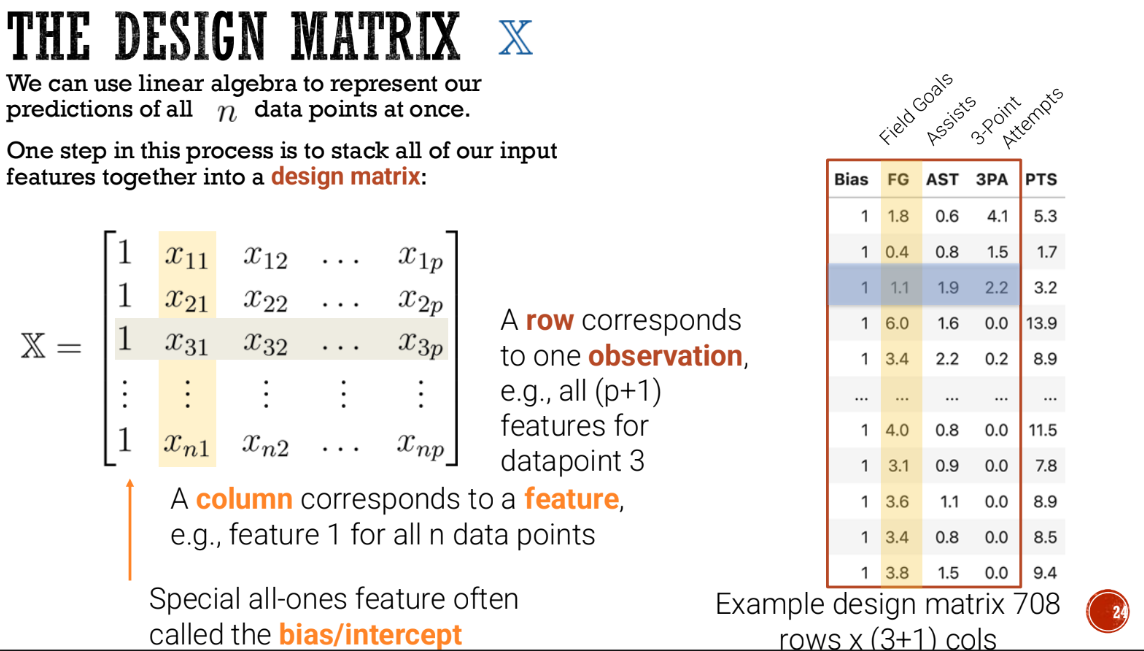

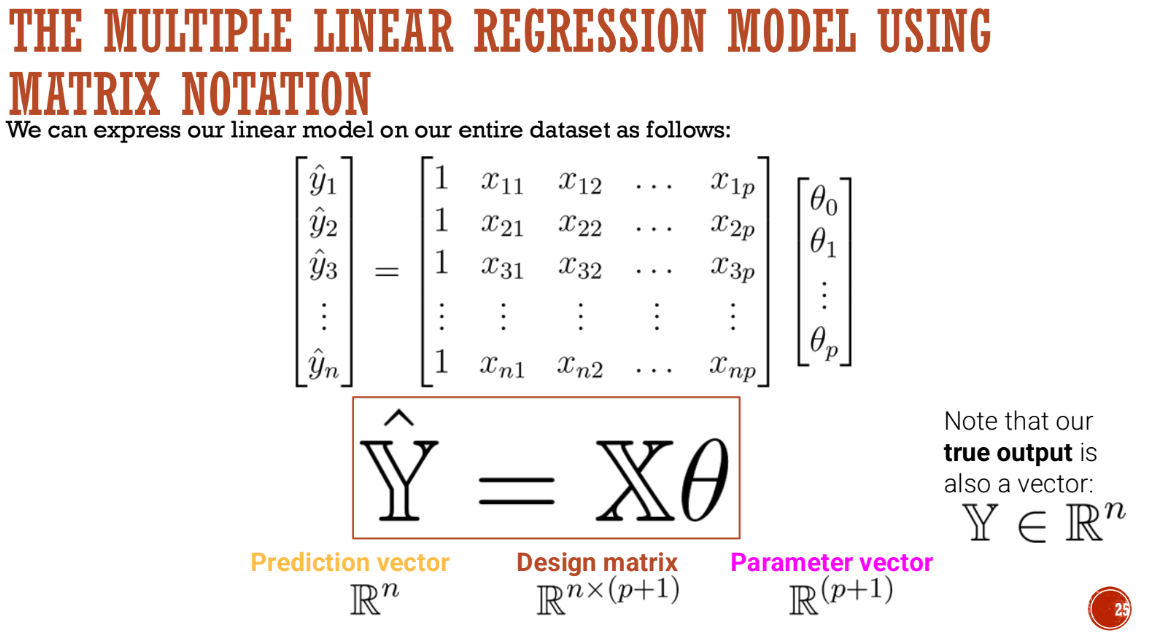

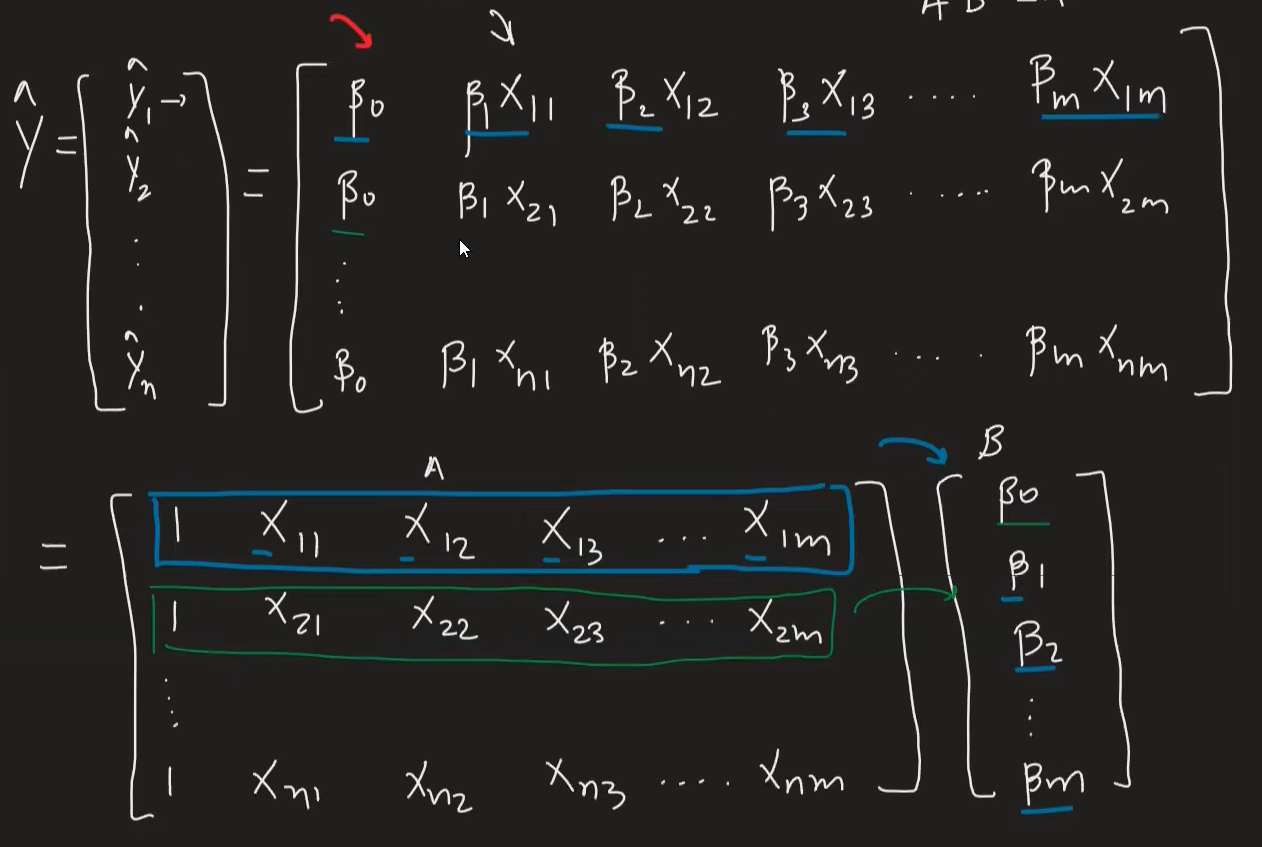

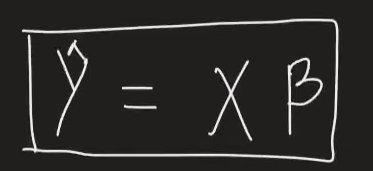

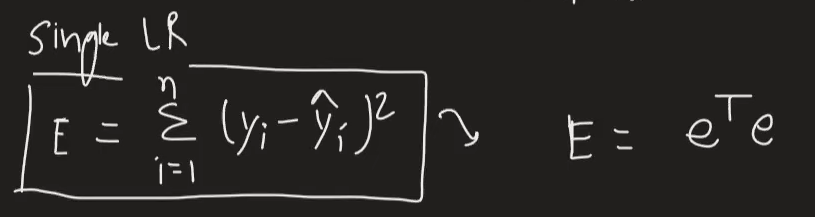

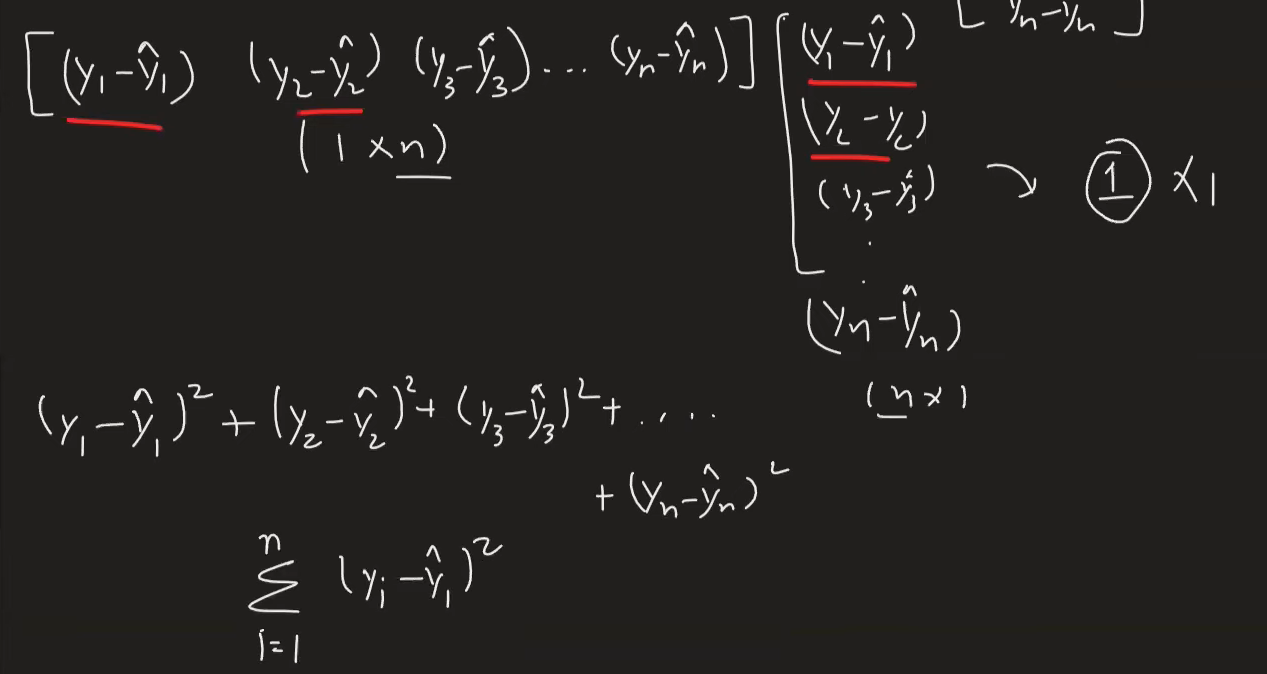

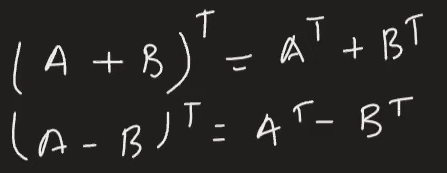

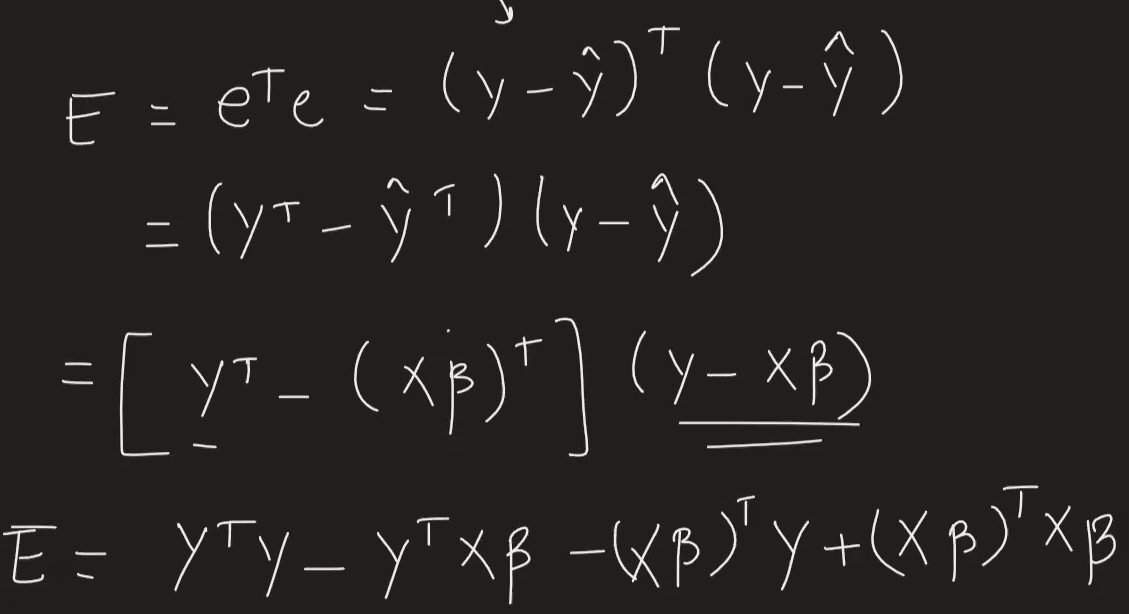

Simplifying above Error equation by proving that second and third terms are same:

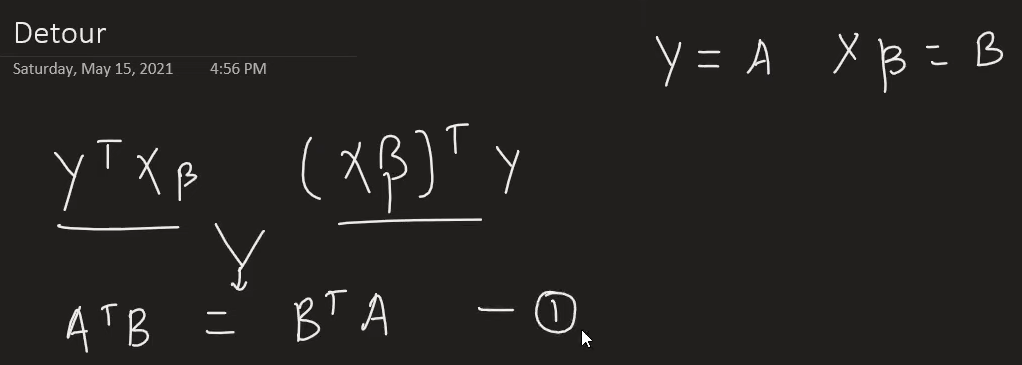

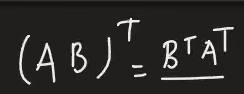

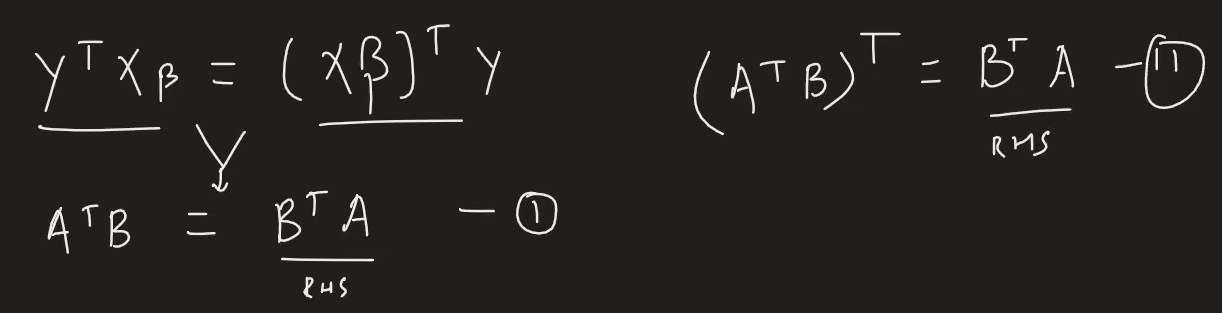

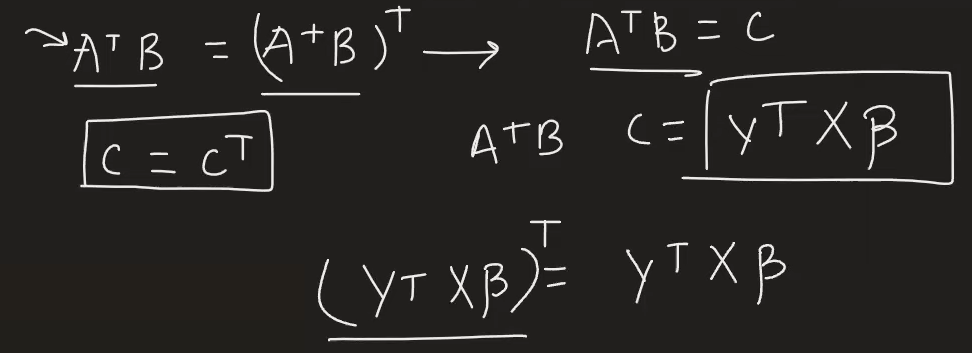

## 2.Loss Function

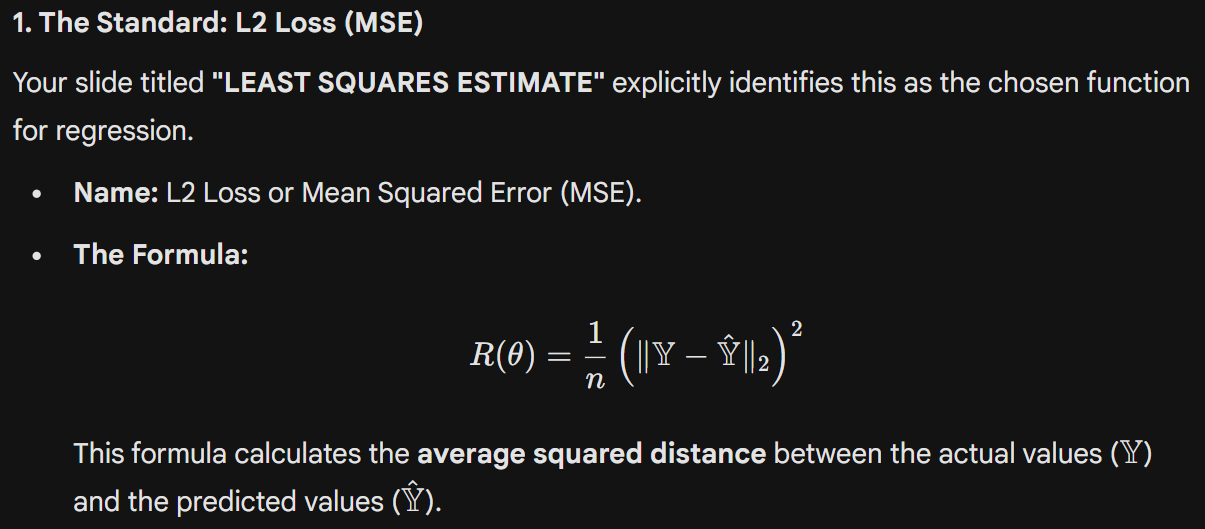

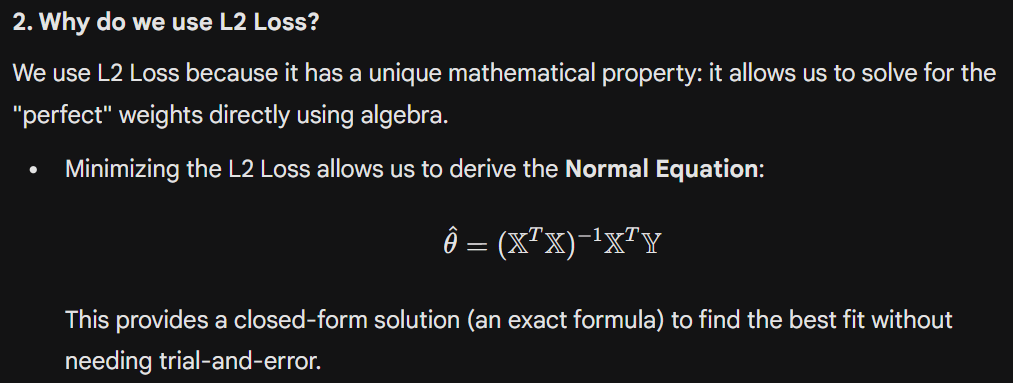

## 3.Fit the Model

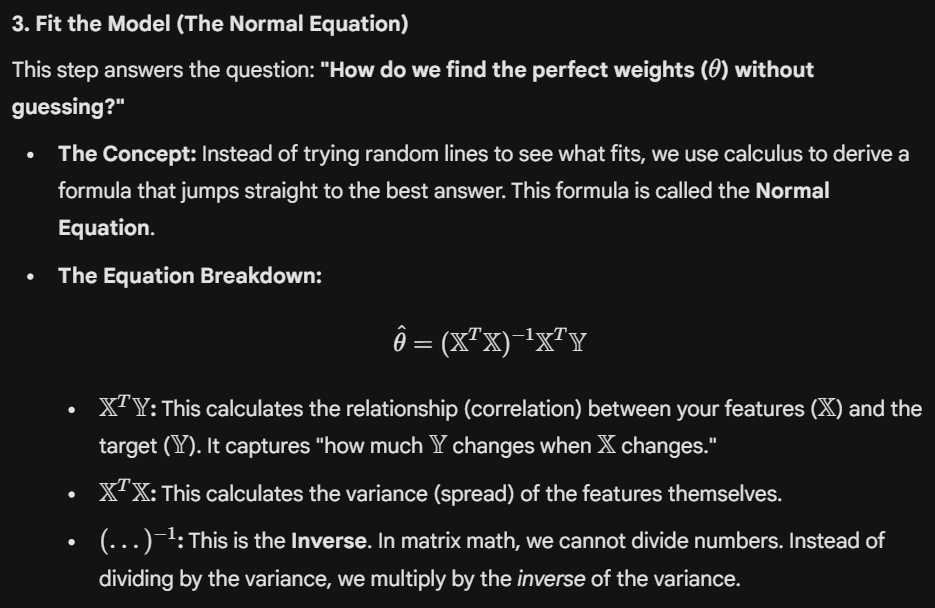

## 4.Evaluate the Model

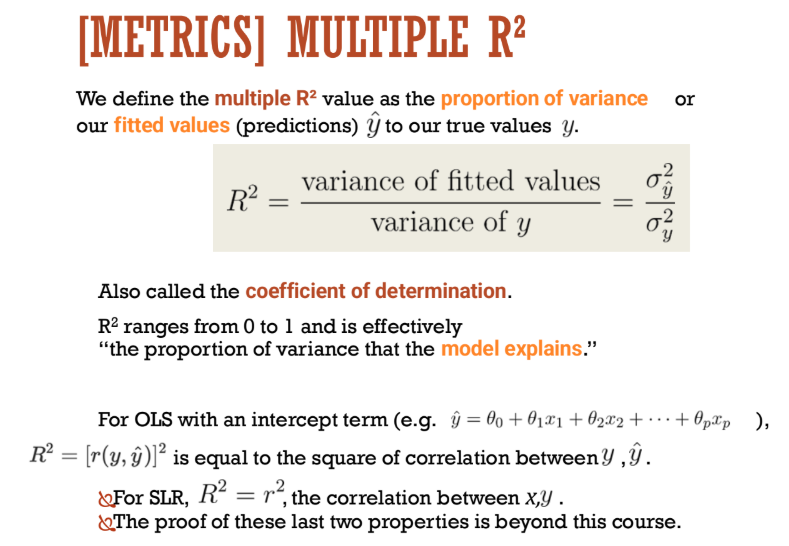

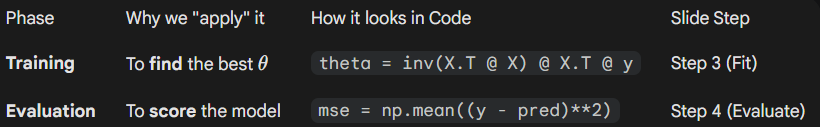

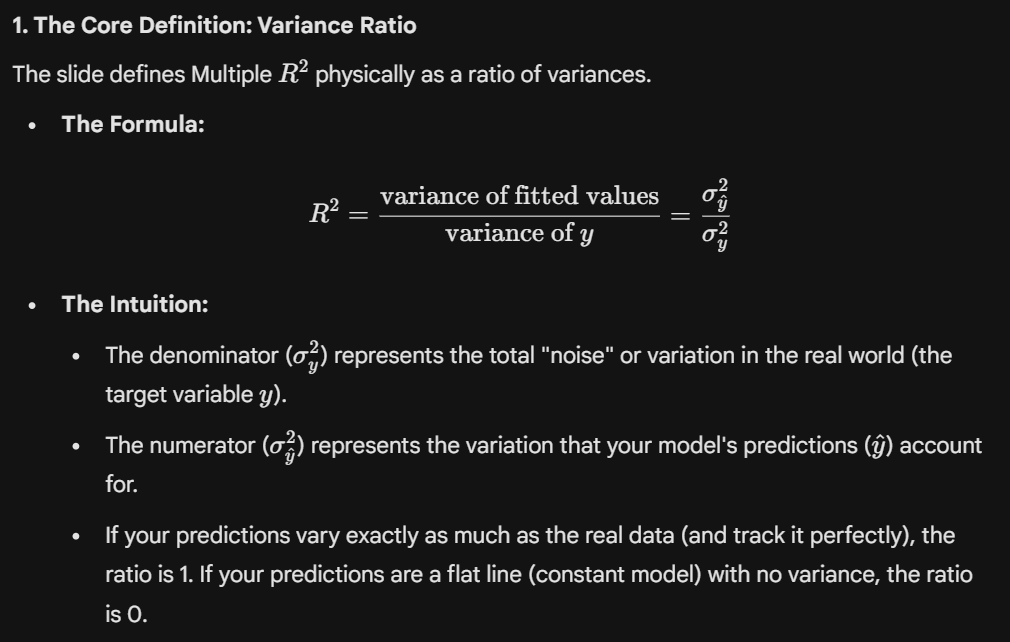

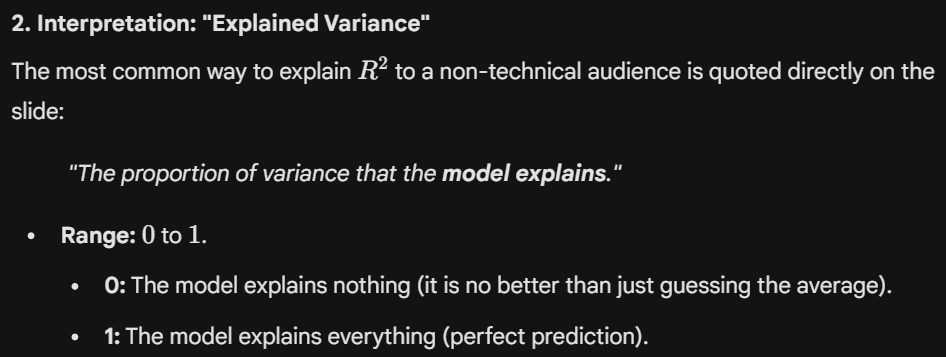

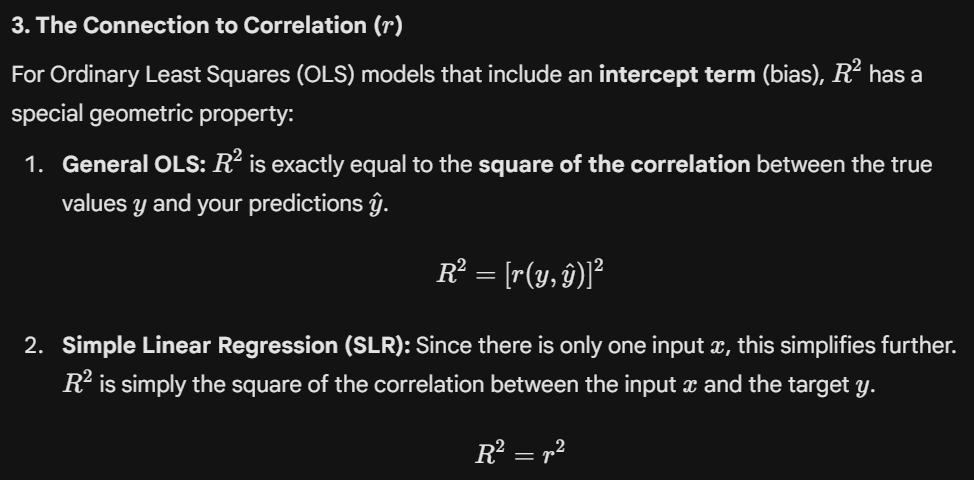

### Example

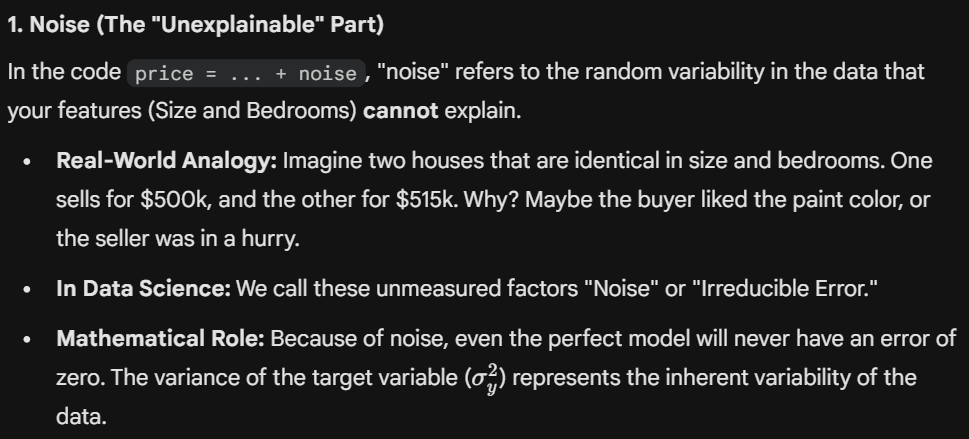

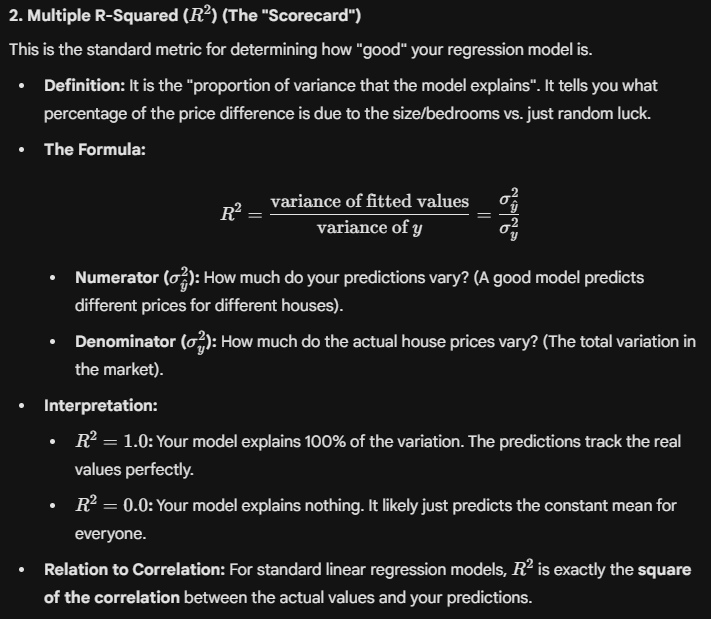

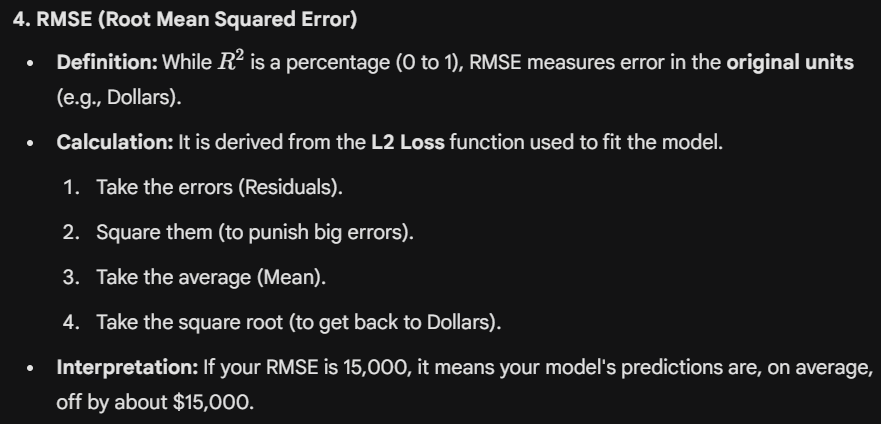

### Comparison with SLR R-Sqaured Formula

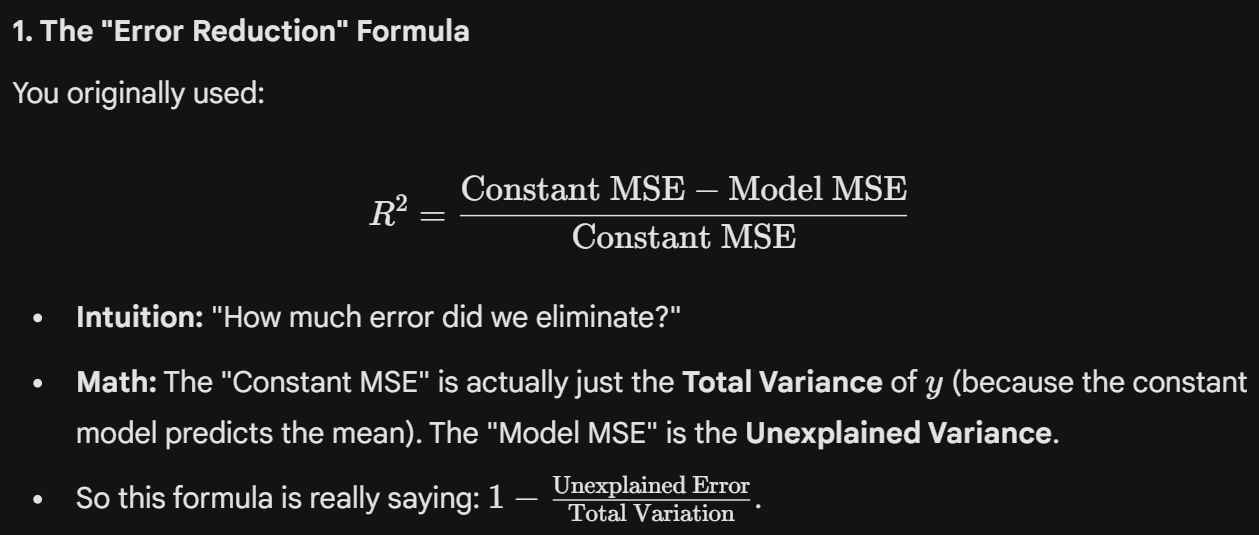

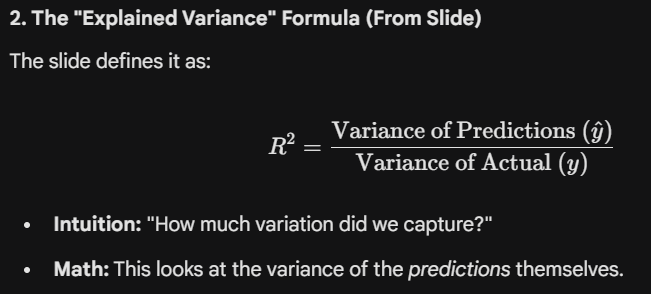

# Code

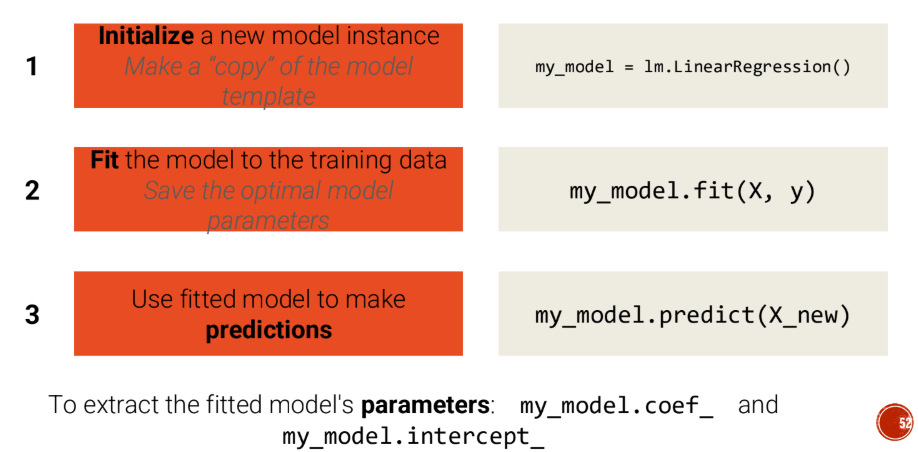

## Multiple Linear Regression

### Built-in Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# --- 1. Create Data (2 Features) ---
data = {
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],   # Feature 1
    'Attendance_%':  [60, 65, 70, 75, 70, 85, 80, 90, 95, 95], # Feature 2
    'Test_Score':    [12, 19, 29, 37, 45, 54, 65, 78, 88, 98]  # Target (y)
}
df = pd.DataFrame(data)

# --- 2. Define Features (X) and Target (y) ---
# X must be a 2D Matrix (Features as columns)
X = df[['Hours_Studied', 'Attendance_%']]
y = df['Test_Score']

# --- 3. Train the Model ---
mlr_model = LinearRegression().fit(X, y)
# mlr_model.fit(X, y) # alternatively

# --- 4. Get Coefficients ---
theta_0 = mlr_model.intercept_
thetas  = mlr_model.coef_

print(f"Intercept (theta_0): {theta_0:.2f}")
print(f"Slope Coefficients (theta_1, theta_2): {thetas}")
print("-" * 30)
print(f"Equation: Score = {theta_0:.2f} + ({thetas[0]:.2f} * Hours) + ({thetas[1]:.2f} * Attendance)")

# --- 5. Prediction Example ---
# Predict score for someone who studied 5 hours and had 90% attendance
new_student = pd.DataFrame([[5, 90]], columns=['Hours_Studied', 'Attendance_%'])
prediction = mlr_model.predict(new_student)
print(f"\nPrediction for 5 hrs + 90% Attendance: {prediction[0]:.2f}")

# --- 6. Model Evaluation (Mean Squared Error on training data) ---
y_pred_all = mlr_model.predict(X)
mse_training = mean_squared_error(y, y_pred_all)
print(f"\nMean Squared Error on Training Data: {mse_training:.2f}\n")

df['Test_Score_Pred'] = y_pred_all
df

Intercept (theta_0): -7.12
Slope Coefficients (theta_1, theta_2): [9.21449704 0.11390533]
------------------------------
Equation: Score = -7.12 + (9.21 * Hours) + (0.11 * Attendance)

Prediction for 5 hrs + 90% Attendance: 49.20

Mean Squared Error on Training Data: 4.00



,Hours_Studied,Attendance_%,Test_Score,Test_Score_Pred
0,1,60,12,8.927515
1,2,65,19,18.711538
2,3,70,29,28.495562
3,4,75,37,38.279586
4,5,70,45,46.924556
5,6,85,54,57.847633
6,7,80,65,66.492604
7,8,90,78,76.846154
8,9,95,88,86.630178
9,10,95,98,95.844675


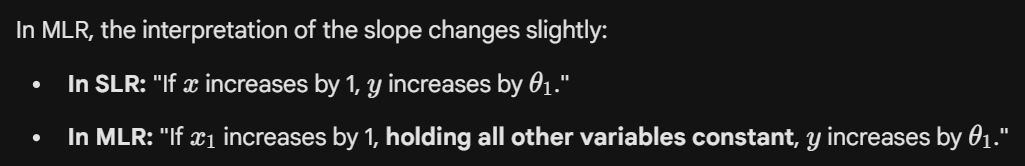

- Model Equation: Score = -7.12 + (9.21 * Hours) + (0.11 * Attendance)

This means:

- For every additional hour studied, the Test Score is predicted to increase by 9.21 points.
- For every 1% increase in Attendance, the Test Score is predicted to increase by 0.11 points.
- The intercept of -7.12 is the predicted score if both hours studied and attendance were zero.


- Prediction Example: For a student who studied 5 hours and had 90% attendance, the predicted Test Score is 49.20.
- Model Evaluation: The Mean Squared Error (MSE) on the training data is 4.00.
This MSE value indicates the average squared difference between the actual and predicted test scores in your training dataset. A lower MSE generally means a better fit of the model to the data.

### Manual

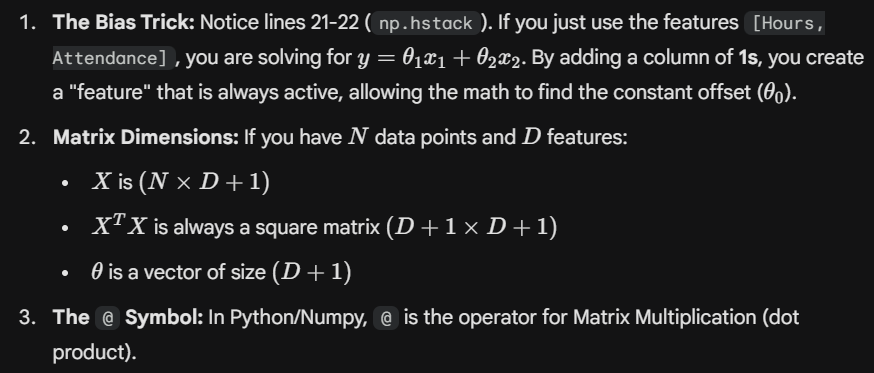

In [ ]:
import numpy as np
import pandas as pd

# --- 1. Prepare the Data ---
# We have 2 features: Hours and Attendance
data = {
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Attendance_%':  [60, 65, 70, 75, 70, 85, 80, 90, 95, 95],
    'Test_Score':    [12, 19, 29, 37, 45, 54, 65, 78, 88, 98]
}
df = pd.DataFrame(data)

# --- 2. Construct the Matrices (The Hard Part) ---

# Step A: Get the features matrix
X_features = df[['Hours_Studied', 'Attendance_%']].to_numpy()

# Step B: The "Bias Trick" (Add a column of 1s)
# We need this to calculate the Intercept (theta_0).
# Without this column, the plane is forced to go through (0,0,0).
ones_column = np.ones((len(X_features), 1)) #((size, no. of columns))
X = np.hstack((ones_column, X_features))

# Step C: Get the target vector
y = df['Test_Score'].to_numpy()

print("Design Matrix X (First 5 rows):\n", X[:5])

# --- 3. Solve the Normal Equation for Optimal Regression Coefficients ---
# Formula: theta_hat = inv(X.T @ X) @ X.T @ y

# Calculate X Transpose
X_T = X.T

# Calculate (X^T * X)
XTX = X_T @ X

# Calculate Inverse of (X^T * X)
XTX_inv = np.linalg.inv(XTX)

# Calculate (X^T * y)
XTy = X_T @ y

# Final Calculation
theta = XTX_inv @ XTy

# --- 4. Interpretation ---
# The result 'theta' is a vector [theta_0, theta_1, theta_2]
theta_0 = theta[0] # Intercept
theta_1 = theta[1] # Weight for Hours
theta_2 = theta[2] # Weight for Attendance

print("\n--- Results from Scratch ---")
print(f"Intercept (theta_0): {theta_0:.4f}")
print(f"Slope for Hours (theta_1):      {theta_1:.4f}")
print(f"Slope for Attendance (theta_2): {theta_2:.4f}")

print(f"\nFinal Equation:")
print(f"Score = {theta_0:.2f} + ({theta_1:.2f} * Hours) + ({theta_2:.2f} * Attendance)")

# --- 5. Prediction Example ---
# Predict for: 5 Hours, 90% Attendance
# We must use vector [1, 5, 90] (Don't forget the 1!)
student_vec = np.array([1, 5, 90])
prediction = student_vec @ theta

print(f"\nNew Value Prediction for 5 hrs + 90% Attendance: {prediction:.2f}")

# --- 6. Predict All ---
y_pred = X @ theta
rSquare = np.var(y_pred) / np.var(y)
print(f"\nR-Squared: {rSquare:.4}")

df['Test_Score_Pred'] = y_pred
print(df)

Design Matrix X (First 5 rows):
 [[ 1.  1. 60.]
 [ 1.  2. 65.]
 [ 1.  3. 70.]
 [ 1.  4. 75.]
 [ 1.  5. 70.]]

--- Results from Scratch ---
Intercept (theta_0): -7.1213
Slope for Hours (theta_1):      9.2145
Slope for Attendance (theta_2): 0.1139

Final Equation:
Score = -7.12 + (9.21 * Hours) + (0.11 * Attendance)

New Value Prediction for 5 hrs + 90% Attendance: 49.20

R-Squared: 0.9948
   Hours_Studied  Attendance_%  Test_Score  Test_Score_Pred
0              1            60          12         8.927515
1              2            65          19        18.711538
2              3            70          29        28.495562
3              4            75          37        38.279586
4              5            70          45        46.924556
5              6            85          54        57.847633
6              7            80          65        66.492604
7              8            90          78        76.846154
8              9            95          88        86.630178
9        

Interpretation of R-Squared: If the output is 0.9948, it means your model has successfully captured 99% of the variation in the target data, leaving 1% as unexplained random noise.

### All-in-one (Manual Optimal Parameter, MSE, RMSE, R-Sqaured, Plotting)

--- Data Snapshot ---
   Size  Bedrooms          Price
0  1360         2  311140.638811
1  1794         2  388654.919026
2  1630         1  322673.805185
3  1595         2  348205.669693
4  2138         5  482254.972253
------------------------------
--- Model Parameters (Theta) ---
Intercept (theta_0):    $47,295.04 (Base Price)
Slope Size (theta_1):   $149.54 per sq ft
Slope Rooms (theta_2):  $26953.94 per room
------------------------------
--- Performance Metrics ---
MSE (Average Error):   $241,707,666.48
RMSE (Average Error):   $15,546.95
Multiple R-squared:     0.9866
------------------------------
INTERPRETATION:
1. R^2 of 0.99 means the model explains 98.7% of the price variation.
2. The true coefficient for Size was 150. The model found 149.54.
   (This proves the Normal Equation successfully recovered the 'hidden law').


   Size  Bedrooms          Price     Price_Pred      Residual
0  1360         2  311140.638811  304576.413857   6564.224954
1  1794         2  388654.919026

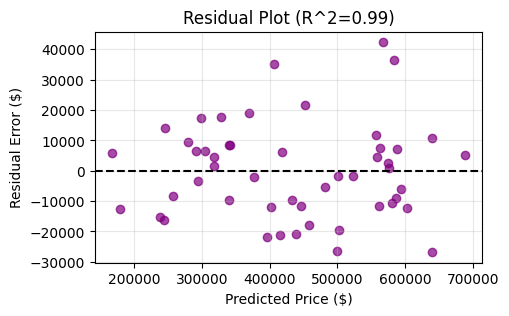

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Generate Synthetic Data ---
# We will simulate Real Estate Data: Price = f(Size, Bedrooms)
# Underlying "True" Law: Price = 50k + (150 * Size) + (25k * Rooms)
np.random.seed(42) # For reproducible results
n_samples = 50

# Feature 1: House Size (sq ft)
size = np.random.randint(500, 3500, n_samples)

# Feature 2: Number of Bedrooms
bedrooms = np.random.randint(1, 6, n_samples)

# Target: Price ($) + Random Noise (Standard deviation = 15k)
noise = np.random.normal(0, 15000, n_samples)
price = 50000 + (150 * size) + (25000 * bedrooms) + noise

# Store in DataFrame
df = pd.DataFrame({'Size': size, 'Bedrooms': bedrooms, 'Price': price})

print("--- Data Snapshot ---")
print(df.head())
print("-" * 30)

# --- 2. Matrix Preparation (The "Bias Trick") ---
# Create Design Matrix X (Features + Column of 1s)
# This corresponds to X in the slide equation Y = X*theta
X_features = df[['Size', 'Bedrooms']].to_numpy()
ones = np.ones((n_samples, 1)) # ((rows, column))
X = np.hstack((ones, X_features)) # Shape: (50, 3)

# Create Target Vector y
y = df['Price'].to_numpy()

# --- 3. Fit the Model (Step 3: Normal Equation) ---
# Formula: optimal parameter - theta = (X^T * X)^(-1) * X^T * Y
XT = X.T
theta = np.linalg.inv(XT @ X) @ XT @ y

# Extract coefficients
intercept = theta[0]
coef_size = theta[1]
coef_rooms = theta[2]

print("--- Model Parameters (Theta) ---")
print(f"Intercept (theta_0):    ${intercept:,.2f} (Base Price)")
print(f"Slope Size (theta_1):   ${coef_size:.2f} per sq ft")
print(f"Slope Rooms (theta_2):  ${coef_rooms:.2f} per room")
print("-" * 30)

# --- 4. Evaluation (Step 2 & 4) ---
# Calculate Predictions (Y_hat = X * theta)
y_pred = X @ theta

# A. Calculate MSE (Step 2: L2 Loss)
residuals = y - y_pred
mse = np.mean(residuals**2)
rmse = np.sqrt(mse)

# B. Calculate Multiple R-squared
# Formula: Variance of Fitted / Variance of Actual y
var_fitted = np.var(y_pred)
var_y = np.var(y)
r_squared = var_fitted / var_y

print("--- Performance Metrics ---")
print(f"MSE (Average Error):   ${mse:,.2f}")
print(f"RMSE (Average Error):   ${rmse:,.2f}")
print(f"Multiple R-squared:     {r_squared:.4f}")

# --- 5. Interpretation ---
print("-" * 30)
print(f"INTERPRETATION:")
print(f"1. R^2 of {r_squared:.2f} means the model explains {r_squared*100:.1f}% of the price variation.")
print(f"2. The true coefficient for Size was 150. The model found {coef_size:.2f}.")
print(f"   (This proves the Normal Equation successfully recovered the 'hidden law').\n\n")

df['Price_Pred'] = y_pred
df['Residual'] = residuals
print(df.head(10))

# --- 6. Visualization: Residual Plot ---
plt.figure(figsize=(5, 3))
plt.scatter(y_pred, residuals, color='purple', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--')
plt.title(f"Residual Plot (R^2={r_squared:.2f})")
plt.xlabel("Predicted Price ($)")
plt.ylabel("Residual Error ($)")
plt.grid(True, alpha=0.3)
plt.show()

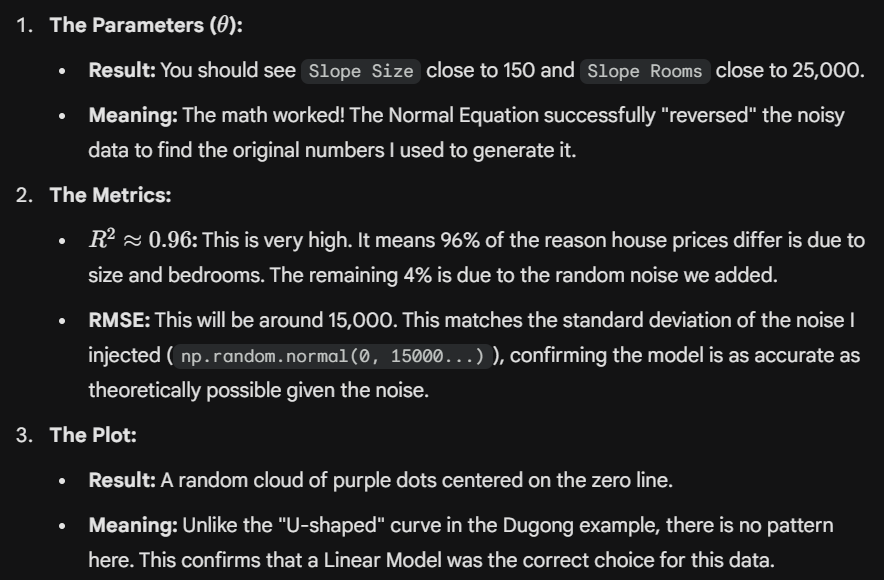